In [2]:
from scipy.ndimage import generic_filter
import numpy as np
import os
import common_function as cf

base_path  = '/home/jorge.gacitua/experimentos/L96_multiple_experiments/data/LETKF/'
output_dir = '/home/jorge.gacitua/experimentos/L96_multiple_experiments/figures'



def strict_nanmean_filter(arr, size=3):
    def filter_func(window):
        if np.isnan(window).any():
            return np.nan
        return np.mean(window)

    # Apply the filter with a footprint of size x size
    return generic_filter(arr, function=filter_func, size=size, mode='nearest')


Freq = 4
Den = 1.0
ObseErr = '5'
nens_labels = np.array([20])
alpha_range = np.array([2])
niter_range = np.array([0, 1, 2,3, 4, 5, 6, 7, 8, 9])
n_niter = len(niter_range)
n_alpha = len(alpha_range)
n_nens = len(nens_labels)
best_inflation = np.empty((n_nens, n_alpha, n_niter))  # 3 methods: LETKF, T2, T3
best_localization = np.empty((n_nens, n_alpha, n_niter))
min_rmse = np.empty((n_nens, n_alpha, n_niter))
min_rmse_smooth = np.empty((n_nens, n_alpha, n_niter))

for k, method_idx in enumerate(niter_range):  # LETKF, T2, T3
    for iens, nens in enumerate(nens_labels):
        for ialpha, alpha in enumerate(alpha_range):
            filename = f"LETKF_Paper_Nature_Freq{Freq}_Den{Den}_Type3_ObsErr{ObseErr}_Nens{nens}_NTemp{method_idx+1}_alpha{alpha}_NOGEC.npz"
            filepath = os.path.join(base_path, filename)

            if os.path.exists(filepath):
                data = np.load(filepath, allow_pickle=True)
                rmse = data['total_analysis_rmse']
                NormalEnd = 1 - data['NormalEnd']
                NormalEnd = NormalEnd.astype(bool)
                rmse[NormalEnd] = np.nan
                rmse = cf.outlier_rmse_filter(rmse)

                # Apply smoothing
                rmse_smooth = strict_nanmean_filter(rmse, size=3)
                min_idx = np.nanargmin(rmse_smooth)
                inf_idx, loc_idx = np.unravel_index(min_idx, rmse_smooth.shape)
                min_rmse[iens, ialpha, k] = np.nanmin(rmse)
                min_rmse_smooth[iens, ialpha, k] = np.nanmin(rmse_smooth)
                best_inflation[iens, ialpha, k] = data['mult_inf_range'][inf_idx]
                best_localization[iens, ialpha, k] = data['loc_scale_range'][loc_idx]
            else:
                best_inflation[iens, ialpha, k] = np.nan

In [3]:
Freq = 4
Den = 0.5
ObseErr = '5'
nens_labels = np.array([20])
alpha_range = np.array([2])
niter_range = np.array([0, 1, 2,3, 4, 5, 6, 7, 8, 9])
n_niter = len(niter_range)
n_alpha = len(alpha_range)
n_nens = len(nens_labels)
best_inflation_05 = np.empty((n_nens, n_alpha, n_niter))  # 3 methods: LETKF, T2, T3
best_localization_05 = np.empty((n_nens, n_alpha, n_niter))
min_rmse_05 = np.empty((n_nens, n_alpha, n_niter))
min_rmse_smooth_05 = np.empty((n_nens, n_alpha, n_niter))

for k, method_idx in enumerate(niter_range):  # LETKF, T2, T3
    for iens, nens in enumerate(nens_labels):
        for ialpha, alpha in enumerate(alpha_range):
            filename = f"LETKF_Paper_Nature_Freq{Freq}_Den{Den}_Type3_ObsErr{ObseErr}_Nens{nens}_NTemp{method_idx+1}_alpha{alpha}_NOGEC.npz"
            filepath = os.path.join(base_path, filename)

            if os.path.exists(filepath):
                data = np.load(filepath, allow_pickle=True)
                rmse = data['total_analysis_rmse']
                NormalEnd = 1 - data['NormalEnd']
                NormalEnd = NormalEnd.astype(bool)
                rmse[NormalEnd] = np.nan
                rmse = cf.outlier_rmse_filter(rmse)

                # Apply smoothing
                rmse_smooth = strict_nanmean_filter(rmse, size=3)
                min_idx = np.nanargmin(rmse_smooth)
                inf_idx, loc_idx = np.unravel_index(min_idx, rmse_smooth.shape)
                min_rmse_05[iens, ialpha, k] = np.nanmin(rmse)
                min_rmse_smooth_05[iens, ialpha, k] = np.nanmin(rmse_smooth)
                best_inflation_05[iens, ialpha, k] = data['mult_inf_range'][inf_idx]
                best_localization_05[iens, ialpha, k] = data['loc_scale_range'][loc_idx]
            else:
                best_inflation_05[iens, ialpha, k] = np.nan

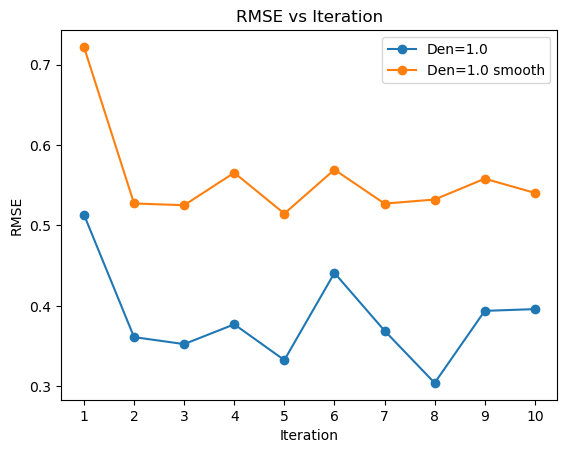

In [5]:
import matplotlib.pyplot as plt

plt.plot(min_rmse[0, 0, :], label='Den=1.0', marker='o')
plt.plot(min_rmse_smooth[0, 0, :], label='Den=1.0 smooth', marker='o')
#plt.plot(min_rmse_05[0, 0, :], label='Den=0.5', marker='o')
#plt.plot(min_rmse_smooth_05[0, 0, :], label='Den=0.5 smooth', marker='o')
plt.xticks(range(len(niter_range)), niter_range+1)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('RMSE vs Iteration')
plt.legend()
plt.show()

Figure saved as: 
 PDF: /home/jorge.gacitua/experimentos/L96_multiple_experiments/figures/Figure_Alpha_nens_Sensitivity_Freq4_Den1.0_Type3_nens_ObsErr5_NOGEC.pdf 
 PNG: /home/jorge.gacitua/experimentos/L96_multiple_experiments/figures/Figure_Alpha_nens_Sensitivity_Freq4_Den1.0_Type3_nens_ObsErr5_NOGEC.png


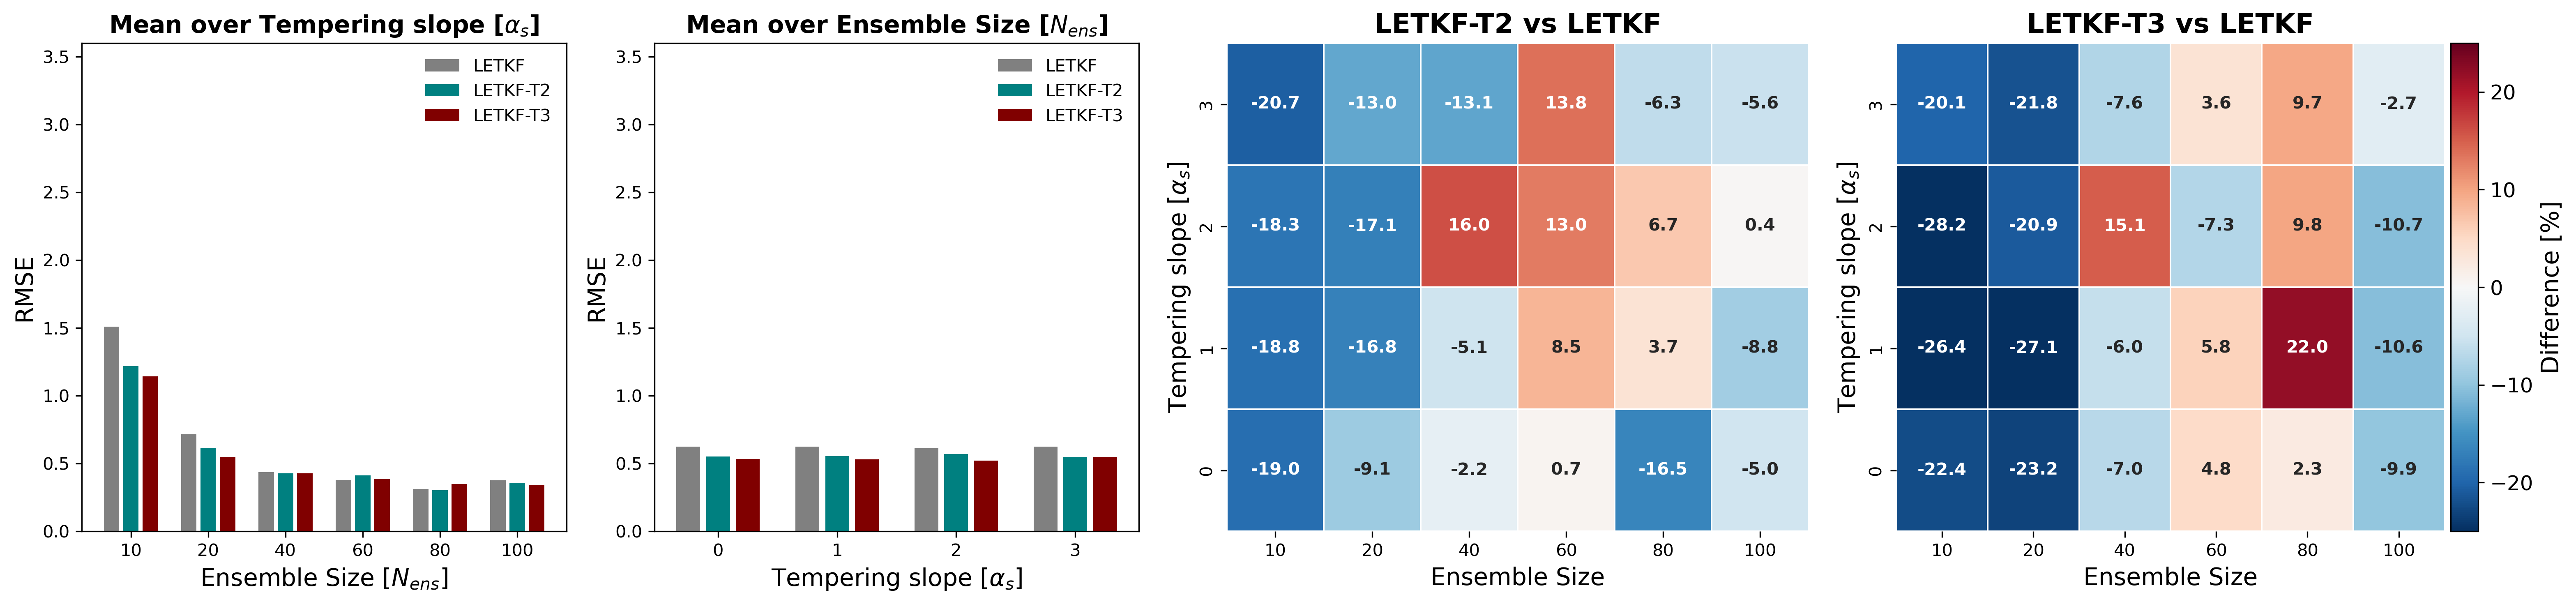

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import common_function as cf

Freq = 4
Den = 1.0
ObseErr = 5
gec = '_NOGEC'

base_path  = '/home/jorge.gacitua/experimentos/L96_multiple_experiments/data/LETKF/'
output_dir = '/home/jorge.gacitua/experimentos/L96_multiple_experiments/figures'
#base_path  = r'/media/jgacitua/storage/L96_multiple_experiments/data/LETKF'
#output_dir = r'/media/jgacitua/storage/L96_multiple_experiments/figures'

filename = f'rmse_values_smooth_frec{Freq}_den{Den}_obs{ObseErr}.npz'
rmse_values_smooth = np.load(os.path.join(base_path, filename))['rmse_values']

# Assume you already loaded rmse_values_smooth: [n_ens, n_alpha, n_temp]
nens_labels = np.array([10, 20, 40, 60, 80, 100])
alpha_range = np.array([0, 1, 2, 3])

# Extract LETKF (n_temp = 0), LETKF-T2 (n_temp = 1), LETKF-T3 (n_temp = 2)
letkf      = rmse_values_smooth[:, :, 0]  # shape: (nens, alpha)
letkf_t2   = rmse_values_smooth[:, :, 1]
letkf_t3   = rmse_values_smooth[:, :, 2]

# Calculate % change relative to LETKF
pct_t2 = ((letkf_t2 - letkf) / letkf) * 100
pct_t3 = ((letkf_t3 - letkf) / letkf) * 100

# Set up 3-panel figure
fig, axes = plt.subplots(1, 4, figsize=(21, 5), dpi=300 ,gridspec_kw={'width_ratios': [1, 1, 1.2, 1.2]})

# Panel 1 – LETKF baseline (as horizontal bar since values are alpha-independent)
mean_rmse_letkf = np.mean(letkf, axis=1)  # Take mean across alpha
mean_rmse_letkf_t2 = np.mean(letkf_t2, axis=1)  # Take mean across alpha
mean_rmse_letkf_t3 = np.mean(letkf_t3, axis=1)  # Take mean across alpha
axes[0].bar(np.arange(len(nens_labels))*4, mean_rmse_letkf, color='gray',label='LETKF')
axes[0].bar(np.arange(len(nens_labels))*4+1, mean_rmse_letkf_t2, color='Teal',label='LETKF-T2')
axes[0].bar(np.arange(len(nens_labels))*4+2, mean_rmse_letkf_t3, color='Maroon',label='LETKF-T3')
axes[0].set_xticks(np.arange(len(nens_labels))*4+1)
axes[0].set_xticklabels(nens_labels)
#axes[0].invert_yaxis()
axes[0].set_ylabel("RMSE", fontsize=14)
axes[0].set_title(r"Mean over Tempering slope [$\alpha_s$]", fontsize=14, fontweight='bold')
axes[0].set_xlabel(r"Ensemble Size [$N_{ens}$]", fontsize=14)
axes[0].set_ylim(0, 3.6)
axes[0].legend(loc='upper right', fontsize=10, frameon=False)

# Panel 2 – LETKF baseline (as horizontal bar since values are alpha-independent)
mean_rmse_letkf = np.mean(letkf, axis=0)  # Take mean across alpha
mean_rmse_letkf_t2 = np.mean(letkf_t2, axis=0)  # Take mean across alpha
mean_rmse_letkf_t3 = np.mean(letkf_t3, axis=0)  # Take mean across alpha
axes[1].bar(np.arange(len(alpha_range))*4, mean_rmse_letkf, color='gray',label='LETKF')
axes[1].bar(np.arange(len(alpha_range))*4+1, mean_rmse_letkf_t2, color='Teal',label='LETKF-T2')
axes[1].bar(np.arange(len(alpha_range))*4+2, mean_rmse_letkf_t3, color='Maroon',label='LETKF-T3')
axes[1].set_xticks(np.arange(len(alpha_range))*4+1)
axes[1].set_xticklabels(alpha_range)
#axes[0].invert_yaxis()
axes[1].set_ylabel("RMSE", fontsize=14)
axes[1].set_title(r"Mean over Ensemble Size [$N_{ens}$]", fontsize=14, fontweight='bold')
axes[1].set_xlabel(r"Tempering slope [$\alpha_s$]", fontsize=14)
axes[1].set_ylim(0, 3.6)
axes[1].legend(loc='upper right', fontsize=10, frameon=False)

# Common settings for heatmaps
vmin, vmax = -25, 25  # Adjust based on range of your % differences

# Panel 3 – % change LETKF-T2 vs LETKF
hm_t2=sns.heatmap(pct_t2.T, annot=True, fmt=".1f", cmap="RdBu_r", center=0,
            vmin=vmin, vmax=vmax, xticklabels=nens_labels, yticklabels=alpha_range,
            ax=axes[2], cbar=False,cbar_kws={"label": "Difference [%]"}, linewidth=.5, annot_kws={"fontsize": 10,"fontweight": "bold"})
#hm_t2.collections[0].colorbar.ax.yaxis.label.set_size(14)   # Colorbar label
axes[2].set_title("LETKF-T2 vs LETKF", fontsize=16, fontweight='bold')
axes[2].set_xlabel("Ensemble Size", fontsize=14)
axes[2].set_ylabel(r"Tempering slope [$\alpha_s$]", fontsize=14)
axes[2].invert_yaxis()
# Panel 4 – % change LETKF-T3 vs LETKF
hm_t3=sns.heatmap(pct_t3.T, annot=True, fmt=".1f", cmap="RdBu_r", center=0,
            vmin=vmin, vmax=vmax, xticklabels=nens_labels, yticklabels=alpha_range,
            ax=axes[3],cbar=False, cbar_kws={"label": "Difference [%]"}, linewidth=.5, annot_kws={"fontsize": 10,"fontweight": "bold"})
#hm_t3.collections[0].colorbar.ax.yaxis.label.set_size(14)   # Colorbar label
axes[3].set_title("LETKF-T3 vs LETKF", fontsize=16, fontweight='bold')
axes[3].set_xlabel("Ensemble Size", fontsize=14)
axes[3].set_ylabel(r"Tempering slope [$\alpha_s$]", fontsize=14)
axes[3].invert_yaxis()
# Layout adjustment
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Use a divider to create a new axis for the colorbar
divider = make_axes_locatable(axes[3])
cax = divider.append_axes("right", size="5%", pad=0.05)

# Add colorbar to the new axis using one of the heatmap mappables
cbar = fig.colorbar(hm_t3.collections[0], cax=cax)
cbar.set_label("Difference [%]", fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.tight_layout()
os.makedirs(output_dir, exist_ok=True)
figname = f"Figure_Alpha_nens_Sensitivity_Freq{Freq}_Den{Den}_Type3_nens_ObsErr{ObseErr}{gec}"
output_pdf = os.path.join(output_dir, f"{figname}.pdf")
output_png = os.path.join(output_dir, f"{figname}.png")

#plt.savefig(output_pdf, dpi=300, bbox_inches='tight', format='pdf')
#plt.savefig(output_png, dpi=300, bbox_inches='tight', format='png')
#plt.show()

print(f"Figure saved as: \n PDF: {output_pdf} \n PNG: {output_png}")
plt.show()
